## 🔁 Graph Representation Learning

### ❓ What is Graph Representation Learning?

In modern semi-supervised learning, **graph representation learning** (also called **graph embedding**) refers to learning **efficient and independent features** from graph nodes, with the aim of using them in machine learning tasks such as prediction.

---

### 📌 How It Works:

Each node `u` in the graph is mapped to a **low-dimensional vector** (embedding):



<center>
    <img src="images/image1.png" alt="Image" width="600"/>
</center>


$$
f: u \to \mathbb{R}^d
$$



This resulting vector is known as the **embedding vector**.


### 🎯 Goal:

The goal of these methods is to **embed nodes** into **low-dimensional vectors** in a way that **preserves their structural context** in the graph.  
In other words, we want to **embed nodes into a hidden space** where the **geometric relationships** reflect the **original graph neighborhood structure**.


### 🧠 Applications:

- Node classification  
- Link prediction  
- Graph classification  
- Anomaly detection  
- Community detection


## 📊 Graph Embedding

Graph embedding is a technique that can address the challenge of graph analysis in a **cost-effective** and **precise** manner.  
This method converts the graph into a **vector-based representation** (typically in lower dimensions) based on its structure.



### 🖼️ Visual Explanation of Graph Embedding Types

**(A)** Original Graph  
Nodes are color-coded into three clusters:
- Blue: A, B, C, D  
- Yellow: E, F, G  
- Red: H, I, J  



**(B)** Node Embedding  
Each **node** is embedded into a 2D space, preserving structural similarity.  
Nodes from the same cluster are located close to each other.



**(C)** Edge Embedding  
Each **edge** is mapped to a point in 2D space.  
The goal is to preserve the edge-level relationships.



**(D)** Subgraph Embedding  
Groups of nodes (subgraphs) are represented in a compact form, capturing local structures like communities.



**(E)** Whole Graph Embedding  
The entire graph is embedded into a single point in space — useful for comparing whole graphs.



# How can we learn the embedding function *f*?


<center>
    <img src="images/image2.png" alt="Image" width="600"/>
</center>


## 🔷 Node Embedding: Encoding with Matrix Formulation

We focus on **node embedding** based on the **encoder-decoder framework**.

### ✅ Encoder Function

We define a function that maps each node $v \in \mathcal{V}$ to an embedding vector $\mathbf{z}_v \in \mathbb{R}^d$:

$\text{ENC} : \mathcal{V} \rightarrow \mathbb{R}^d,\quad \text{ENC}(v) = \mathbf{z}_v$

This function **encodes** the node $v$ into a low-dimensional vector representation.



### 🟨 Embedding Matrix $Z$

We can arrange all node embeddings in a matrix:

$Z \in \mathbb{R}^{d \times |\mathcal{V}|}$

Each **column** of $Z$ corresponds to the embedding of one node:

$Z[:, v] = \mathbf{z}_v$

So we can write:

$\text{ENC}(v) = Z \cdot \mathbf{x}_v$

where $\mathbf{x}_v$ is a **one-hot vector** indicating the index of node $v$.



### 📌 Notes:

- Each **column** of $Z$ represents the **embedding** for a node.
- $\mathbf{z}_v \in \mathbb{R}^d$: the latent representation of node $v$.
- This formulation allows us to apply vector operations efficiently.




<center>
    <img src="images/image3.png" alt="Image" width="600"/>
</center>


### 🎯 Decoder Objective: Reconstructing the Relationship Between Nodes $u$ and $v$

In graph representation learning, the **decoder** reconstructs information about the original graph using the node embeddings:

$$
\text{DEC}: \mathbb{R}^d \times \mathbb{R}^d \rightarrow \mathbb{R}^+
$$

The decoder receives the embeddings of nodes $u$ and $v$, and estimates their similarity:

$$
\text{DEC}(\text{ENC}(u), \text{ENC}(v)) = \text{DEC}(z_u, z_v) \approx S[u, v]
$$

- Here, $S[u, v]$ is an entry in the **similarity matrix** $S$, which captures how similar or connected nodes $u$ and $v$ are in the original graph.



### 💡 A Simple Choice for $S$:

We can use the adjacency matrix $A$ of the graph as the similarity matrix:

$$
S[u, v] \triangleq A[u, v]
$$

This means:

- $S[u, v] = 1$ if nodes $u$ and $v$ are connected  
- $S[u, v] = 0$ otherwise

### 🔹 Common Neighbors

To calculate the number of common neighbors between nodes $v_i$ and $v_j$, we can compute:

$$
S_{CN} = AA
$$

- For an **undirected graph**, the matrix $S_{CN}[i][j]$ shows the number of common neighbors between nodes $v_i$ and $v_j$.

- For a **directed graph**, $S_{CN}[i][j]$ counts the number of nodes $v_k$ such that there are **paths from $v_j$ to $v_k$ and from $v_k$ to $v_i$** — i.e., $v_j \rightarrow v_k \rightarrow v_i$.


### 🔄 Pairwise Decoder

A **pairwise decoder** $\text{DEC}(z_u, z_v)$ predicts the **relationship or similarity** between nodes $u$ and $v$.  
For example, it may estimate whether the two nodes are **neighbors** in the original graph.



> ✅ The goal is to **minimize reconstruction error** between the predicted similarity and the true similarity in $S$,  
> thus optimizing both the **encoder** and the **decoder** functions.


___

# 🔷 Node Representation Learning: Shallow Embedding

- This is an **unsupervised** method for node representation learning.

- We **do not use node labels**.
- We **do not use node features**.

- The goal is to **directly estimate an embedding vector for each node**, such that certain aspects of the graph structure are preserved.

- These embeddings are **independent of any downstream prediction task**.


## Shallow Embedding

- $z_u$: the embedding of node $u$, which is the target of our learning process.

- If $\mathcal{D}$ is the set of training data pairs, the goal is to minimize the following loss function $\mathcal{L}$:

$$
\mathcal{L} = \sum_{(u,v) \in \mathcal{D}} \ell\left( \text{DEC}(z_u, z_v),\ \text{S}[u,v] \right)
$$

where $\ell: \mathbb{R} \times \mathbb{R} \rightarrow \mathbb{R}$

- $\ell$ is a loss function that measures the difference between the decoded similarity $\text{DEC}(z_u, z_v)$ and the true similarity $S[u,v]$.

- The loss function $\ell$ can vary depending on how similarity and the decoder are defined. A common choice is the **mean squared error** for regression or classification.


___

___

___

# Creating Node Representations with DeepWalk


# 📌 Introducing Word2Vec

The first step to comprehending the DeepWalk algorithm is to understand its major component: **Word2Vec**.

---

## 🧠 What is Word2Vec?

Word2Vec is one of the most influential deep-learning techniques in NLP.  
Published in 2013 by **Tomas Mikolov et al.** at Google, it introduced a way to convert words into vectors — called **embeddings** — using large text datasets.

These embeddings:

- Allow computers to understand the **meaning of words** numerically.
- Are useful in downstream tasks (like sentiment analysis or graph node classification).
- Are a famous and patented example of successful ML architecture.


## 📊 Example Embeddings

Here are a few example word vectors:

```
vec(king)   = [−2.1, 4.1, 0.6]  
vec(queen)  = [−1.9, 2.6, 1.5]  
vec(man)    = [3.0, −1.1, −2.0]  
vec(woman)  = [2.8, −2.6, −1.1]
```

These are simplified 3-dimensional representations, but real embeddings are often 100–300 dimensions.


## 🧮 Similarity by Euclidean Distance

Let’s compare the Euclidean distances between words:

- Distance between **king** and **queen**: $4.37$
- Distance between **king** and **woman**: $8.47$

This tells us:

➡ $vec(king)$ is **closer** to $vec(queen)$ than it is to $vec(woman)$.



## 🔁 Cosine Similarity (Angle-Based Comparison)

Instead of using distances, **cosine similarity** is often used.  
It compares **angles**, not magnitudes — which makes it better when lengths differ.

It is defined as:

$$
\text{cosine\_similarity}(\vec{A}, \vec{B}) = \cos(\theta) = \frac{\vec{A} \cdot \vec{B}}{\|\vec{A}\| \cdot \|\vec{B}\|}
$$

- $\vec{A} \cdot \vec{B}$ = dot product  
- $\|\vec{A}\|$ = length (norm) of vector A



## 💡 Vector Arithmetic: Word Analogies

One surprising ability of Word2Vec is solving analogies using simple vector math.

Famous example:

> "**man** is to **woman** as **king** is to ___?"

This is calculated as:

$$
\vec{king} - \vec{man} + \vec{woman} \approx \vec{queen}
$$

This relationship doesn’t always hold exactly, but it works surprisingly well in many cases.


# CBOW vs Skip-gram (Word2Vec)

## 🧠 Core Concept
Both **CBOW** and **Skip-gram** are models used in Word2Vec to learn word embeddings — dense vector representations of words — based on their context in a sentence.

---

## 📘 CBOW (Continuous Bag-of-Words)
This is trained to predict a word using its
surrounding context (words coming before and after the target word). The order of context
words does not matter since their embeddings are summed in the model. The authors claim to
obtain better results using four words before and after the one that is predicted.

### ✅ Goal:
Predict the **center word** given its **context words**.

### 📌 Example:
For the sentence:  
`The cat sits on the mat`

CBOW input and output would be:  
**Input (Context):** `The, cat, on, the`  
**Output (Target):** `sits`


## 📗 Skip-gram
Here, we feed a single word to the model and try to predict
the words around it. Increasing the range of context words leads to better embeddings but also
increases the training time.


### ✅ Goal:
Predict the **context words** given the **center word**.

### 📌 Example:
For the sentence:  
`The cat sits on the mat`

Skip-gram input and output would be:  
**Input (Center):** `sits`  
**Output (Context):** `The, cat, on, the`

<center>
    <img src="images/image4.jpg" alt="Image" width="600"/>
</center>


## 📊 Comparison Table

| Feature         | CBOW                          | Skip-gram                        |
|----------------|-------------------------------|----------------------------------|
| Input           | Context words                 | Center word                      |
| Output          | Center word                   | Context words                    |
| Speed           | Faster to train               | Slower but more accurate         |
| Good for        | Frequent words                | Rare words                       |



___


## 📌 Creating Skip-grams

For now, we will focus on the **skip-gram model** since it is the architecture used by **DeepWalk**.

Skip-grams are implemented as **pairs of words** with the following structure:

```
(target word, context word)
```

- `target word`: the input word to the model.
- `context word`: the word the model tries to predict (surrounding words).



### 🔧 Parameter: `context size`

The number of skip-gram pairs generated for a given target word depends on a parameter called **context size**, which defines how many words before and after the target word are considered context.



### 📊 Example 

Let’s take the sentence:  
**"the train was late"**

<center>
    <img src="images/image5.jpg" alt="Image" width="600"/>
</center>

### 🧠 Practical Usage

- The same idea applies to a **corpus** of text, not just a single sentence.
- We **store all context words** for the same target word in a **list** to save memory.
- The next example will apply this to an entire paragraph, using:



### In the following example, we create skip-grams for an entire paragraph stored in the text variable. We set the CONTEXT_SIZE variable to 2, which means we will look at the two words before and after our target word:

In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
CONTEXT_SIZE = 2

text = """
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc eu sem 
scelerisque, dictum eros aliquam, accumsan quam. Pellentesque tempus, lorem ut 
semper fermentum, ante turpis accumsan ex, sit amet ultricies tortor erat quis 
nulla. Nunc consectetur ligula sit amet purus porttitor, vel tempus tortor 
scelerisque. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices 
posuere cubilia curae; Quisque suscipit ligula nec faucibus accumsan. Duis 
vulputate massa sit amet viverra hendrerit. Integer maximus quis sapien id 
convallis. Donec elementum placerat ex laoreet gravida. Praesent quis enim 
facilisis, bibendum est nec, pharetra ex. Etiam pharetra congue justo, eget 
imperdiet diam varius non. Mauris dolor lectus, interdum in laoreet quis, 
faucibus vitae velit. Donec lacinia dui eget maximus cursus. Class aptent taciti
sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Vivamus
tincidunt velit eget nisi ornare convallis. Pellentesque habitant morbi 
tristique senectus et netus et malesuada fames ac turpis egestas. Donec 
tristique ultrices tortor at accumsan.
""".split()


Next, we create the skip-grams thanks to a simple for loop to consider every word in text.
A list comprehension generates the context words, stored in the skipgrams list:

In [4]:
# Create skipgrams
skipgrams = []
for i in range(CONTEXT_SIZE, len(text) - CONTEXT_SIZE):
    array = [text[j] for j in np.arange(i - CONTEXT_SIZE, i + CONTEXT_SIZE + 1) if j != i]
    skipgrams.append((text[i], array))
    

In [5]:
print(skipgrams[0:2])

[('dolor', ['Lorem', 'ipsum', 'sit', 'amet,']), ('sit', ['ipsum', 'dolor', 'amet,', 'consectetur'])]


These two target words, with their corresponding context, work to show what the inputs to Word2Vec
look like.

___

# 🧠 The Skip-Gram Model

The goal of Word2Vec is to produce **high-quality word embeddings**.  
To learn these embeddings, the training task of the skip-gram model consists of **predicting the correct context words given a target word**.

---

## 🧩 Objective

Imagine that we have a sequence of $N$ words:

$$
w_1, w_2, \dots, w_N
$$

The probability of seeing the word $w_2$ given the word $w_1$ is written as:

$$
p(w_2 \mid w_1)
$$

The goal is to **maximize the sum of every probability of seeing a context word given a target word** in the entire text:

$$
\frac{1}{N} \sum_{n=1}^{N} \sum_{\substack{-C \le j \le C \\ j \neq 0}} \log p(w_{n+j} \mid w_n)
$$

where $C$ is the size of the context window.



## 📦 Why Use Log Probability?

> **Note:**  
> We use log probabilities for two main reasons:

1. **Efficiency:**  
   $$
   \log(A \times B) = \log(A) + \log(B)
   $$
   So multiplication operations turn into addition, which is computationally cheaper.

2. **Numerical Stability:**  
   Computers struggle with **very small numbers**, such as $3.14 \times 10^{-128}$.
   Using logs:
   $$
   \log(3.14 \times 10^{-128}) = -127.5
   $$
   avoids underflow issues.


## 🧮 Softmax-Based Probability

The skip-gram model uses **softmax** to calculate the probability of a context word $w_c$ given a target word $w_t$.

Given:

- $h_t$: embedding of target word  
- $h_c$: embedding of context word  
- $|V|$: vocabulary size  

The formula is:

$$
p(w_c \mid w_t) 
= \frac{\exp(h_c^\top h_t)}
{\sum_{i=1}^{|V|} \exp(h_i^\top h_t)}
$$

---

## 🗂️ Vocabulary Size in Code


The vocabulary corresponds to the list of unique words the
model tries to predict. We can obtain this list using the set data structure to remove duplicate words:

In [6]:
vocab = set(text)
VOCAB_SIZE = len(vocab)
print(f"Length of vocabulary = {VOCAB_SIZE}")

Length of vocabulary = 121


### Word2Vec Skip-gram Model Explanation

Now that we have the size of our vocabulary, there is one more parameter we need to define: **N**, the dimensionality of the word vectors. Typically, this value is set between 100 and 1,000. In this example, we will set it to 10 because of the limited size of our dataset.

---

### The Skip-gram Model Architecture

The skip-gram model is composed of only two layers:

- **A projection layer** with a weight matrix \( W_{\text{embed}} \), which takes a one-hot encoded word vector as an input and returns the corresponding N-dim word embedding. It acts as a simple lookup table that stores embeddings of a predefined dimensionality.

- **A fully connected layer** with a weight matrix \( W_{\text{output}} \), which takes a word embedding as input and outputs \( |\mathcal{V}| \)-dim logits. A softmax function is applied to these predictions to transform logits into probabilities.

> **Note:**  
> There is no activation function: Word2Vec is a linear classifier that models a linear relationship between words.

---

### Mathematical Details

Let’s call \( \mathbf{x} \) the one-hot encoded word vector (the **input**). The corresponding word embedding can be calculated as a simple projection:

$$
\mathbf{h} = W_{\text{embed}}^T \cdot \mathbf{x}
$$

Using the skip-gram model, we can rewrite the probability of context word \( w_c \) given target word \( w_t \) as:

$$
p(w_c | w_t) = \frac{\exp(W_{\text{output}} \cdot \mathbf{h})}{\sum_{i=1}^{|\mathcal{V}|} \exp(W_{\text{output}(i)} \cdot \mathbf{h})}
$$

The skip-gram model outputs a \( |\mathcal{V}| \)-dimensional vector, which is the conditional probability of every word in the vocabulary:

$$
\text{word2vec}(w_t) = 
\begin{bmatrix}
p(w_1 | w_t) \\
p(w_2 | w_t) \\
\vdots \\
p(w_{|\mathcal{V}|} | w_t)
\end{bmatrix}
$$

During training, these probabilities are compared to the correct one-hot encoded target word vectors.  
The difference between these values (calculated by a loss function such as the cross-entropy loss) is backpropagated through the network to update the weights and obtain better predictions.


The entire Word2Vec architecture is summarized in the following diagram, with both matrices and
the final softmax layer:

<center>
    <img src="images/image6.jpg" alt="Image" width="800"/>
</center>

### We can implement this model using the gensim library, which is also used in the official implementation of DeepWalk. We can then build the vocabulary and train our model based on the previous text:

Let’s begin by installing gensim and importing the Word2Vec class:

In [9]:
!pip install -qU gensim

In [24]:
from gensim.models.word2vec import Word2Vec

In [11]:
model = Word2Vec(
    [text], 
    sg=1,   # Skip-gram
    vector_size=10,
    min_count=0,
    window=2,
    seed=42
)

It’s a good idea to check the shape of our first weight matrix. It should correspond to the
vocabulary size and the word embeddings’ dimensionality:

In [12]:
print(f'Shape of W_embed: {model.wv.vectors.shape}')

Shape of W_embed: (121, 10)


Next, we train the model for 10 epochs:

In [13]:
model.train([text], total_examples=model.corpus_count,
epochs=10)

(718, 1560)

Finally, we can print a word embedding to see what the result of this training looks like:

In [14]:
print('Word embedding =')
print(model.wv[0])

Word embedding =
[-0.08092759  0.05650158  0.03220123 -0.01081672 -0.01091846  0.07142022
 -0.08430826  0.03745409 -0.06069671 -0.08211951]


While this approach works well with small vocabularies, the computational cost of applying a full
softmax function to millions of words (the vocabulary size ) is too costly in most cases. This has been
a limiting factor in developing accurate language models for a long time. Fortunately for us, other
approaches have been designed to solve this issue.
Word2Vec (and DeepWalk) implements one of these techniques, called H-Softmax. Instead of a flat
softmax that directly calculates the probability of every word, this technique uses a binary tree structure
where leaves are words. Even more interestingly, a Huffman tree can be used, where infrequent words
are stored at deeper levels than common words. In most cases, this dramatically speeds up the word
prediction by a factor of at least 50.
H-Softmax can be activated in gensim using hs=1.
This was the most difficult part of the DeepWalk architecture. But before we can implement it, we
need one more component: how to create our training data.

___

## 🔍 DeepWalk and Random Walks — Key Concepts Explained

DeepWalk, introduced by Perozzi et al. in 2014, is a graph embedding technique inspired by Word2Vec from NLP. It quickly gained popularity because of its simplicity, strong baseline performance, and ability to scale to large graphs.

### ✅ Objective of DeepWalk
The primary goal of DeepWalk is to learn **high-quality feature representations of graph nodes** in an **unsupervised** manner. It aims to embed nodes in a continuous vector space where semantically or structurally similar nodes are close together.



### 🔁 Similarity to Word2Vec

DeepWalk is heavily inspired by the **Word2Vec** model. Here's the analogy:

| Concept          | In Word2Vec (NLP)       | In DeepWalk (Graph)     |
|------------------|--------------------------|---------------------------|
| Training data    | Sentences (word sequences) | Random walks (node sequences) |
| Unit of meaning  | Words                    | Nodes                      |
| Model            | Word2Vec (Skip-gram)     | Word2Vec (Skip-gram)       |
| Goal             | Learn word embeddings    | Learn node embeddings      |

---

### 🚶‍♂️ Random Walks as "Sentences"

- Random walks are used to create sequences of nodes.
- These node sequences act like **sentences**, where each node is treated like a **word**.
- DeepWalk performs multiple random walks starting from each node to generate training data.

The following diagram illustrates the connection between sentences and graphs:

<center>
    <img src="images/image7.jpg" alt="Image" width="600"/>
</center>

### 🔁 How Random Walks Work

- Starting from a node, the walker randomly chooses a neighboring node at each step.
- This process is repeated to generate multiple sequences per node.
- **Nodes can appear multiple times** in the same sequence due to cycles or revisiting.

This idea is at the core of the DeepWalk algorithm: when nodes are close to each other, we want to
obtain high similarity scores. On the contrary, we want low scores when they are farther apart.
Let’s implement a random walk function using a networkx graph:

Let’s implement a random walk function using a networkx graph:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

random.seed(42)

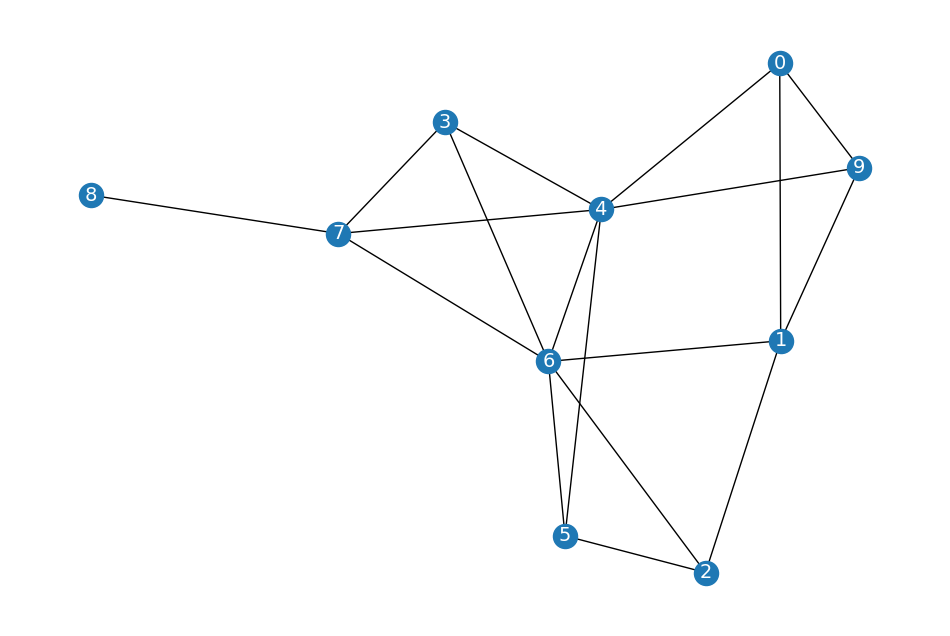

In [4]:
# Create a graph using erdos renyi
G = nx.erdos_renyi_graph(10, 0.3, seed=1, directed=False)

# Plot graph
plt.figure(figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(
    G,
    pos=nx.spring_layout(G, seed=0),
    cmap='coolwarm',
    font_size=14,
    font_color='white'
)

Let’s implement random walks with a simple function. This function takes two parameters:
the starting node (start) and the length of the walk (length). At every step, we randomly
select a neighboring node (using np.random.choice) until the walk is complete:

In [14]:
def random_walk(start, length):
    walk = [str(start)]  # starting node
    
    for i in range(length):
        neighbors = [node for node in G.neighbors(start)]
        next_node = np.random.choice(neighbors, 1)[0]
        walk.append(str(next_node))
        start = next_node
    
    return walk

# Create a list of random walks
print(random_walk(0, 10))

['0', '9', '0', '1', '0', '4', '9', '1', '2', '5', '6']


## Implementing DeepWalk
Now that we have a good understanding of every component in this architecture, let’s use it to solve
an ML problem.

The dataset we will use is Zachary’s Karate Club. It simply represents the relationships within a karate
club studied by Wayne W. Zachary in the 1970s. It is a kind of social network where every node is a
member, and members who interact outside the club are connected.

In this example, the club is divided into two groups: we would like to assign the right group to every
member (node classification) just by looking at their connections:

1. Let’s import the dataset using nx.karate_club_graph():

In [15]:
G = nx.karate_club_graph()

2. Next, we need to convert string class labels into numerical values (Mr. Hi = 0, Officer = 1):

In [18]:
# Process labels (Mr. Hi = 0, Officer = 1)
labels = []
for node in G.nodes:
    label = G.nodes[node]['club']
    labels.append(1 if label == 'Officer' else 0)


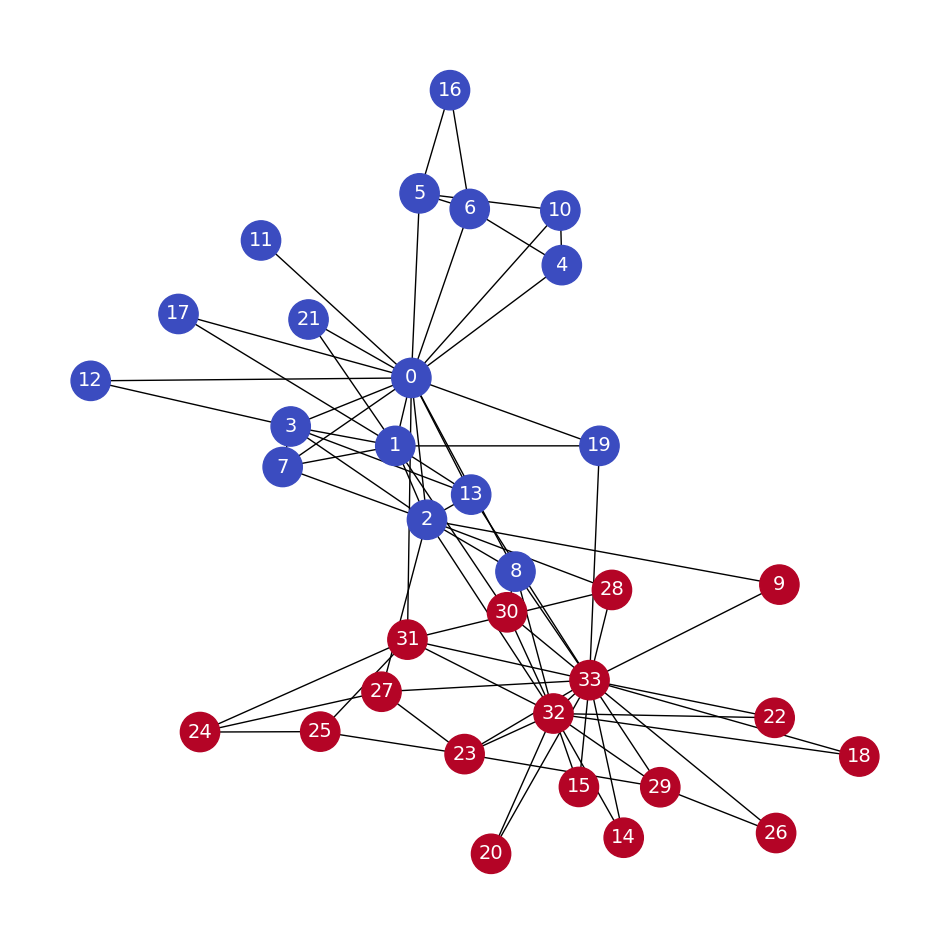

In [19]:
# Plot graph
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_color=labels,
                 node_size=800,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

In [22]:
# Create a list of random walks
walks = []
for node in G.nodes:
    for _ in range(80):
        walks.append(random_walk(node, 10))

# Print the first random walk
print(walks[0])

['0', '21', '1', '2', '0', '3', '1', '17', '0', '17', '1']


In [25]:
# Create Word2Vec
model = Word2Vec(walks,
                 hs=1,   # Hierarchical softmax
                 sg=1,   # Skip-gram
                 vector_size=100,
                 window=10,
                 workers=1,
                 seed=1)

print(f'Shape of embedding matrix: {model.wv.vectors.shape}')


Shape of embedding matrix: (34, 100)


In [26]:
# Train model
model.train(walks, total_examples=model.corpus_count, epochs=30, report_delay=1)

(187460, 897600)

Now that our model is trained, let’s see its different applications. The first one allows us to find
the most similar nodes to a given one (in terms of cosine similarity):

In [27]:
# Most similar nodes
print('Nodes that are the most similar to node 0:')
for similarity in model.wv.most_similar(positive=['0']):
    print(f'   {similarity}')

# Similarity between two nodes
print(f"\nSimilarity between node 0 and 4: {model.wv.similarity('0', '4')}")

Nodes that are the most similar to node 0:
   ('4', 0.7092486023902893)
   ('21', 0.6560182571411133)
   ('10', 0.654299795627594)
   ('6', 0.648286759853363)
   ('1', 0.6348258256912231)
   ('5', 0.6146865487098694)
   ('12', 0.5963711142539978)
   ('11', 0.5934454798698425)
   ('7', 0.5702898502349854)
   ('19', 0.5619927644729614)

Similarity between node 0 and 4: 0.7092486619949341


We can plot the resulting embeddings using t-distributed stochastic neighbor embedding (t-SNE)
to visualize these high-dimensional vectors in 2D:

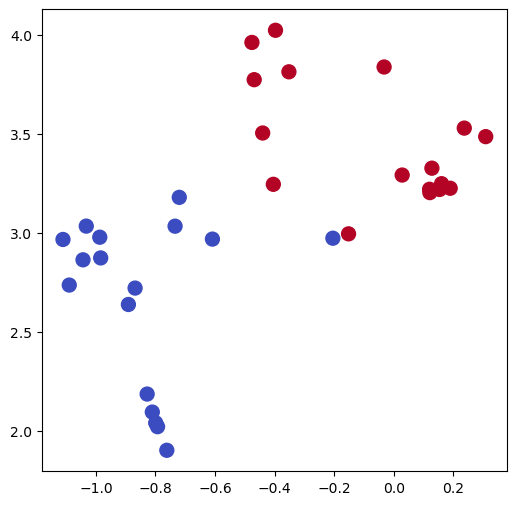

In [28]:
from sklearn.manifold import TSNE

# Preprocess word vectors and label
nodes_wv = np.array([model.wv.get_vector(str(i)) for i in range(len(model.wv))])
labels = np.array(labels)

# Train TSNE
tsne = TSNE(n_components=2,
            learning_rate='auto',
            init='pca',
            random_state=0).fit_transform(nodes_wv)

# Plot TSNE
plt.figure(figsize=(6, 6))
plt.scatter(tsne[:, 0], tsne[:, 1], s=100, c=labels, cmap="coolwarm")
plt.show()

This plot is quite encouraging since we can see a clear line that separates the two classes. It should
be possible for a simple ML algorithm to classify these nodes with enough examples (training data).
Let’s implement a classifier and train it on our node embeddings:

We import a Random Forest model from sklearn, which is a popular choice when it comes
to classification. The accuracy score is the metric we’ll use to evaluate this model:

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create masks to train and test the model
train_mask = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
test_mask = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33]

# Train classifier
clf = RandomForestClassifier(random_state=0)
clf.fit(nodes_wv[train_mask], labels[train_mask])

# Evaluate accuracy
y_pred = clf.predict(nodes_wv[test_mask])
acc = accuracy_score(y_pred, labels[test_mask])
print(f'Accuracy = {acc*100:.2f}%')

Accuracy = 95.45%
